# Analysis of English Premier League 2018-2019 season
<h4>Content</h4>

+ Introduction
+ Data description
+ Formulation of research question
+ Data preparation

# 1.Introduction
The English Premier League is a professional football competition held in the United Kingdom. It is attended by 20 English clubs. There are about 580 players participated in EPL from 2018-2019 season.
Let's move on to the process of running League games. A table of 20 teams is created in which each of them plays with all the others twice: at their own stadiums(at home) and others'(away).If a team wins a match, it is awarded 3 points, a draw is 1 point, and a loss is 0 points. There are n*(n-1)/2 games in total, which in our case is 190 games. Which team will score the most points in 38 rounds then it will become the winner of the tournament. Also, along with points,other statistics are counted, such as the number of wins, draws, losses, goals scored and conceded, as well as the difference between goals scored and goals conceded. For example, in the 2019-2020 season, Liverpool became the champion with the following statistics: 32 wins, 3 draws, 3 losses, 85 goals and 33 conceded, the difference is 52.

Full description of the League you can read on https://en.wikipedia.org/wiki/Premier_League

<img src="https://cdn-blog.scorum.com/production/mortilla007/7da1f4df8e27dd77_800" >

# 2.Data description
Since football is not only a ball game and it is important not only the final score, after each game is taken detailed statistics of the match, players, how many resultative actions made by a particular player. Based on this observation:
+ Bookmakers determine the coefficient for the next games of this team. 
+ Coaches choose the best starting line-up, knowing the best qualities of the players. 
+ Sports analysts guess the score of a match based on that data.
+ The Premier League compiles complete statistics of the past season, such as the best teams, players, defenders, scorers, assistants and so on.

My analysis will cover 4 datasets of year 2019. One the main set includes data about players, the size of which is 572 rows. Three additional ones are data about teams that are 20 rows in size, data about league itself - 1 row and all team matches are 380 rows in size. All three form is an overall information about the Premier League.<br>
Analysis of the <mark>players</mark> dataset will be based on such indicators as:<br>

+ position - characterizes the location of the player in the match(such as striker, midfielder, defender, goalkeeper)
+ minutes played - how much time the player spent on the field for the entire season 
+ nationality
+ number of goals
+ number of assists(pass that led to a goal)
+ number of yellow cards - cards awarded for agressive play
+ number of red cards - such cards remove the player from the game for unsportsmanlike behavior
+ rank in the top Strikers 
+ rank in the top Midfielders 
+ rank in the top Defenders
+ rank in the top Goalkeepers 



Analysis of the <mark>matches</mark> dataset consists of:
+ home team name
+ away team name
+ referee - the name of a referee in a match
+ home team goal count - goals scored by home team in a game
+ away team goal count - goals scored by away team in a game
+ home team goal timing - minutes in which goals are scored by home team
+ away team goal timing - minutes in which goals are scored by away team
+ total corners count - number of corner kicks during a game
+ total yellow card count
+ total red card count
+ home team shots on target - number of shots directed to a goal's target by home team
+ away team shots on target - number of shots directed to a goal's target by away team


Analysis of the <mark>teams</mark> dataset consists of:
+ matches played
+ wins
+ wins home 
+ wins away 
+ draws home
+ draws away
+ losses home
+ losses away
+ average points per game
+ goals scored
+ goals conceded
+ goals difference

Analysis of the <mark>league</mark> dataset consists of:
+ total matches
+ goals scored
+ goals conceded
+ clean sheets - games where team does not concede goals 
+ total corners
+ total red cards
+ total yellow cards

# 3.Formulation of research question
My project will consist of 5 parts:
1. Analysis of points scored, goals scored, goals conceded by each team, and building a team distribution table based on it.
2. Analysis of additional club data, such as the number of wins, losses, draws and the average number of points scored per match.
3. Analysis of the performance of teams at home and away, how they play in the first half of the match and in the second
4. Analysis of players resultative actions and discipline: top scorers, assistants, defenders, goalkeepers.
5. Analysis of expected goals(describing the approximate number of shots on target per match), goals scored, shots on target per match. This statistic helps in predictions of game outcomes.

# 4.Data preparation

In [16]:
import pandas as pd
import numpy as np
import requests
import pandas_profiling

In [17]:
# let's open players.csv file
# the main one
csv_file = open(file = 'players.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')
# three additional files
csv1_file = open(file = 'teams.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')

csv2_file = open(file = 'league.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')

csv3_file = open(file = 'matches.csv',
               mode = 'r',
               encoding = 'ISO-8859-1')

In [18]:
# show csv file in txt format
csv_file.read()

"full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer\nAaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,England,20,10,8,0,0,0,1,1,0,0,0,3,2,1,22,12,10,1,0,0.06,0.06,0,0,0,0,1.25,72,79,1589,1589,0.06,292

In [91]:
# use pandas in order to show file as a dataframe
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')

players

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,...,1.25,72,79,1589,1589,0.06,292,193,80,20
1,Aaron Lennon,33,545529600,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,...,1.48,61,76,1217,1217,0.07,198,187,-1,10
2,Aaron Mooy,29,653356800,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,...,1.78,51,80,582,2327,0.15,147,233,-1,3
3,Aaron Ramsey,29,662169600,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,19,968284800,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,Premier League,2018/2019,Midfielder,Leicester City,1092,575,517,...,1.07,84,84,546,273,0.16,81,13,-1,4
568,Yves Bissouma,23,841363200,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,1022,...,1.53,59,63,354,0,0.25,402,335,-1,17
569,Zechariah Medley,20,962928000,Premier League,2018/2019,Defender,Arsenal,0,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
570,Zeze Steven Sessegnon,20,958608000,Premier League,2018/2019,Defender,Fulham,0,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [20]:
# dataframe size
players.shape

(572, 46)

In [92]:
# dataframe size
teams.shape

(20, 280)

In [93]:
# delete unnecessary columns
players.drop(['birthday' , 'league' , 'season', "rank_in_league_top_attackers", "rank_in_league_top_midfielders",
              "rank_in_league_top_defenders", "rank_in_club_top_scorer"], axis = 'columns', inplace = True)
players

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
0,Aaron Cresswell,30,Defender,West Ham United,1589,888,701,England,20,10,...,0.00,0.00,0.00,0,1.25,72,79,1589,1589,0.06
1,Aaron Lennon,33,Midfielder,Burnley,1217,487,730,England,16,5,...,0.07,0.18,0.00,1217,1.48,61,76,1217,1217,0.07
2,Aaron Mooy,29,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,13,...,0.12,0.08,0.16,776,1.78,51,80,582,2327,0.15
3,Aaron Ramsey,29,Midfielder,Arsenal,1327,689,638,Wales,28,8,...,0.27,0.26,0.28,332,0.81,111,47,0,221,0.00
4,Aaron Rowe,19,Forward,Huddersfield Town,69,14,55,England,2,0,...,0.00,0.00,0.00,0,1.30,69,35,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,Midfielder,Leicester City,1092,575,517,Belgium,13,7,...,0.25,0.31,0.17,364,1.07,84,84,546,273,0.16
568,Yves Bissouma,23,Midfielder,Brighton & Hove Albion,1769,747,1022,Mali,28,7,...,0.00,0.00,0.00,0,1.53,59,63,354,0,0.25
569,Zechariah Medley,20,Defender,Arsenal,0,0,0,England,0,0,...,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00
570,Zeze Steven Sessegnon,20,Defender,Fulham,0,0,0,England,0,0,...,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00


<h3>Not corresponding values in players dataframe</h3>
<br>
In the dataframe there are such columns as clean_sheets_overall and conceded_overall which are closely related to Goalkeepers and not related to Other positions. So we delete values of these columns where corresponding player position is not Goalkeeper and replace them by 0.

In [25]:
players
for x in players.index:
    if players.loc[x, "position"] != 'Goalkeeper':
        players.loc[x, "clean_sheets_overall"] = 0
        players.loc[x, "conceded_overall"] = 0
        players.loc[x, "clean_sheets_home"] = 0
        players.loc[x, "clean_sheets_away"] = 0
        players.loc[x, "conceded_home"] = 0
        players.loc[x, "conceded_away"] = 0
        players.loc[x, "conceded_per_90_overall"] = 0
        players.loc[x, "min_per_conceded_overall"] = 0

In [27]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   full_name                      572 non-null    object 
 1   age                            572 non-null    int64  
 2   position                       572 non-null    object 
 3   Current Club                   572 non-null    object 
 4   minutes_played_overall         572 non-null    int64  
 5   minutes_played_home            572 non-null    int64  
 6   minutes_played_away            572 non-null    int64  
 7   nationality                    572 non-null    object 
 8   appearances_overall            572 non-null    int64  
 9   appearances_home               572 non-null    int64  
 10  appearances_away               572 non-null    int64  
 11  goals_overall                  572 non-null    int64  
 12  goals_home                     572 non-null    int

In [94]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 280 entries, team_name to goals_conceded_min_81_to_90
dtypes: float64(30), int64(246), object(4)
memory usage: 43.9+ KB


In [28]:
# the another way to find null values 
players.isnull().sum()

full_name                        0
age                              0
position                         0
Current Club                     0
minutes_played_overall           0
minutes_played_home              0
minutes_played_away              0
nationality                      0
appearances_overall              0
appearances_home                 0
appearances_away                 0
goals_overall                    0
goals_home                       0
goals_away                       0
assists_overall                  0
assists_home                     0
assists_away                     0
penalty_goals                    0
penalty_misses                   0
clean_sheets_overall             0
clean_sheets_home                0
clean_sheets_away                0
conceded_overall                 0
conceded_home                    0
conceded_away                    0
yellow_cards_overall             0
red_cards_overall                0
goals_involved_per_90_overall    0
assists_per_90_overa

In [95]:
teams.isnull().sum()

team_name                      0
common_name                    0
season                         0
country                        0
matches_played                 0
                              ..
goals_conceded_min_41_to_50    0
goals_conceded_min_51_to_60    0
goals_conceded_min_61_to_70    0
goals_conceded_min_71_to_80    0
goals_conceded_min_81_to_90    0
Length: 280, dtype: int64

In [96]:
# drop missing values
players1 = players.dropna()
teams1 = teams.dropna()

In [30]:
players1.describe()

,age,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,...,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,27.470280,1313.013986,656.692308,656.321678,18.321678,7.307692,7.307692,1.818182,1.005245,0.812937,...,0.096976,0.105577,0.084843,435.720280,0.094406,4.494755,56.318182,473.501748,462.798951,0.139773
std,4.420636,1097.063878,557.817278,549.534640,12.879531,6.391742,6.276167,3.474473,2.148997,1.615915,...,0.170403,0.211251,0.170112,719.624393,0.407487,20.866811,30.764232,610.155728,732.959698,0.232466
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,208.250000,90.000000,97.500000,5.750000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.750000,0.000000,0.000000,0.000000
50%,28.000000,1103.500000,540.000000,557.000000,19.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,327.500000,0.000000,0.100000
75%,30.000000,2172.500000,1126.250000,1116.500000,30.000000,13.000000,13.000000,2.000000,1.000000,1.000000,...,0.122500,0.120000,0.120000,609.000000,0.000000,0.000000,83.000000,670.750000,681.500000,0.200000
max,41.000000,3420.000000,1710.000000,1710.000000,38.000000,19.000000,19.000000,22.000000,18.000000,11.000000,...,1.450000,1.910000,1.550000,3403.000000,3.250000,270.000000,90.000000,3420.000000,3420.000000,4.090000


In [97]:
teams1.describe()

,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,wins_away,draws,draws_home,draws_away,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
count,20.0,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.00000,20.00000,20.00000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,38.0,19.0,19.0,0.0,15.450000,9.050000,6.400000,7.10000,3.55000,3.55000,...,9.300000,4.100000,5.800000,5.400000,4.900000,5.900000,5.600000,6.650000,5.950000,9.300000
std,0.0,0.0,0.0,0.0,7.250953,4.019361,3.560012,2.44734,1.90498,1.79106,...,4.130758,2.074913,2.783409,3.424371,2.807884,2.425739,2.722228,2.960708,3.379115,4.040584
min,38.0,19.0,19.0,0.0,3.000000,2.000000,1.000000,2.00000,0.00000,0.00000,...,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
25%,38.0,19.0,19.0,0.0,10.750000,6.000000,4.000000,6.75000,2.00000,2.00000,...,7.750000,3.000000,3.500000,3.000000,3.000000,4.750000,4.000000,4.000000,3.750000,6.750000
50%,38.0,19.0,19.0,0.0,14.500000,8.000000,6.000000,7.00000,3.00000,4.00000,...,9.500000,4.000000,6.000000,5.000000,4.500000,6.000000,5.000000,7.000000,6.000000,9.500000
75%,38.0,19.0,19.0,0.0,19.500000,10.500000,9.000000,9.00000,5.00000,5.00000,...,11.000000,5.250000,8.000000,7.250000,7.000000,7.000000,7.000000,8.250000,8.000000,11.250000
max,38.0,19.0,19.0,0.0,32.000000,18.000000,14.000000,12.00000,8.00000,8.00000,...,19.000000,8.000000,11.000000,15.000000,11.000000,10.000000,12.000000,12.000000,13.000000,16.000000


In [31]:
# check for duplicated rows 
pl2 = players1.duplicated()
players1[pl2]

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall


In [98]:
pl2 = teams1.duplicated()
teams1[pl2]

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90


<h3>About large number of zeros in the dataframe</h3>

In the DataFrame I don't need to replace zeros to another values, because in football there are data that can be equal to zero. Example: Goalkeepers usually don't participate in attack that's why they don't score goals

# 5.Data Visualization

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Q1: Analysis of the teams indicators

<h3>Teams distribution by achieved points</h3>

Text(0.5, 1.0, 'Achieved points by teams')

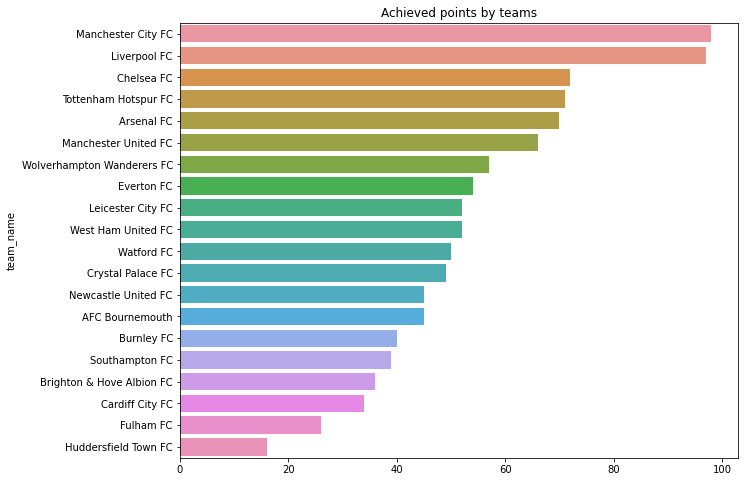

In [102]:
plt.figure(figsize=(10, 8))
sns.barplot(y = teams.sort_values(by = ['league_position'])['team_name'], x = teams['wins']*3 + teams['draws']).set_title("Achieved points by teams")

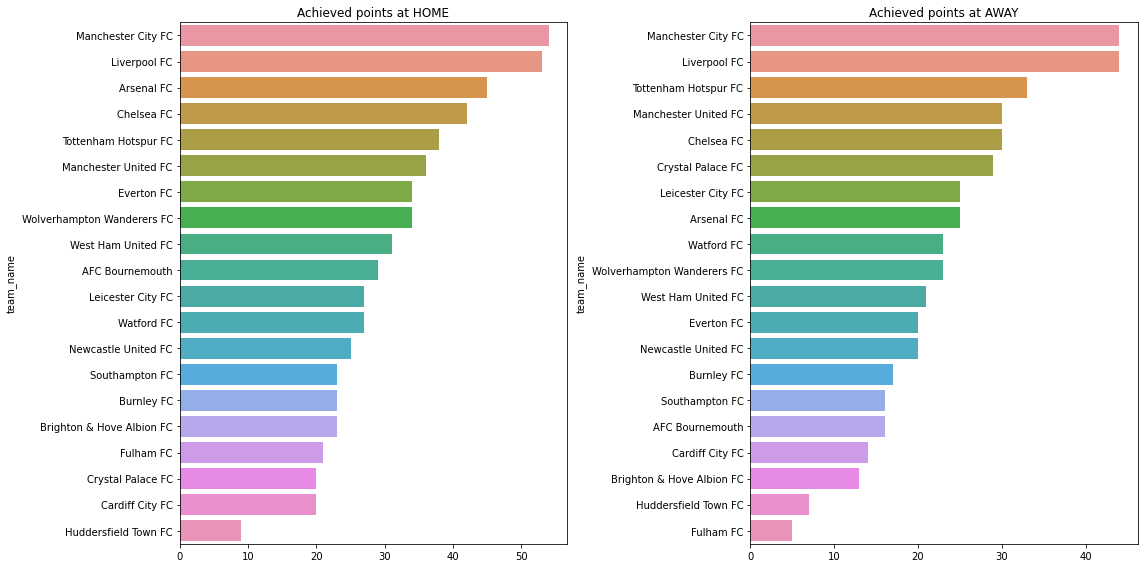

In [103]:
f, fig = plt.subplots(1, 2, figsize = (16, 8))

sns.barplot(y = teams.sort_values(by = ['league_position_home'])['team_name'], x = teams['wins_home']*3 + teams['draws_home'], ax = fig[0]).set_title("Achieved points at HOME")

sns.barplot(y = teams.sort_values(by = ['league_position_away'])['team_name'], x = teams['wins_away']*3 + teams['draws_away'], ax = fig[1]).set_title("Achieved points at AWAY")

f.tight_layout()

Text(0.5, 1.0, 'Scored goals distribution in each team')

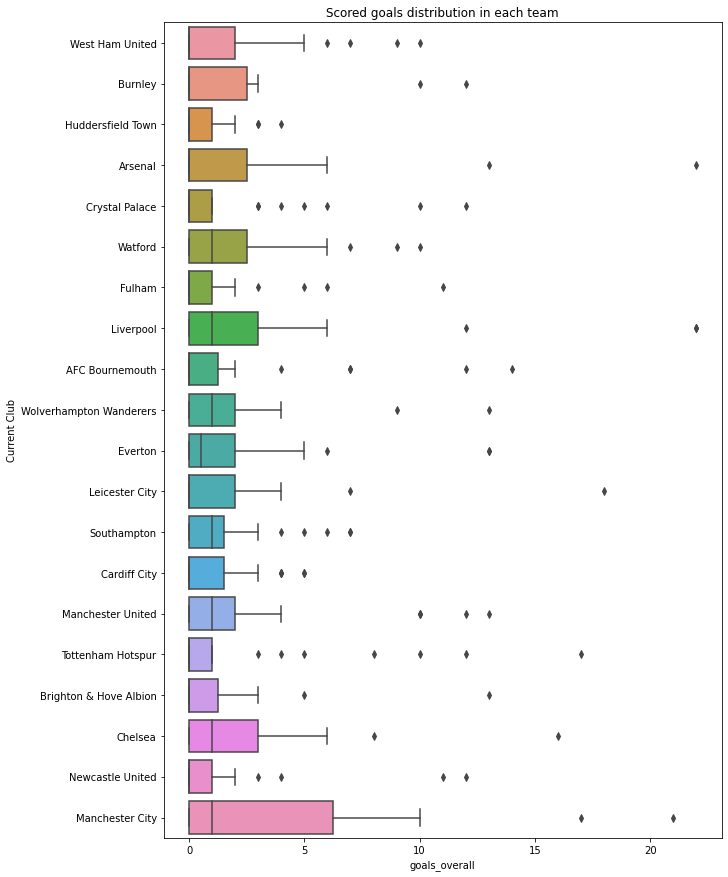

In [107]:
plt.figure(figsize=(10, 15))
sns.boxplot( y = players["Current Club"], x = players["goals_overall"], data = players).set_title("Scored goals distribution in each team")

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Scored goals distribution by each player'}, xlabel='goals_overall'>

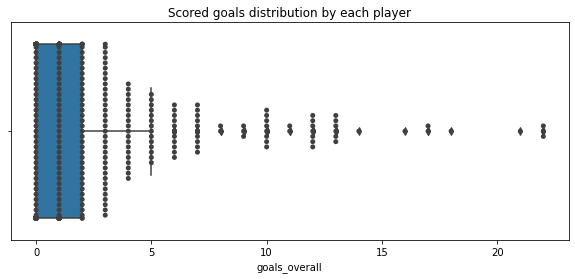

In [109]:
plt.figure(figsize=(10, 4))
sns.boxplot( x = players["goals_overall"], data = players).set_title("Scored goals distribution by each player")
sns.swarmplot( x = players["goals_overall"], data = players, color = ".25")

# Findings
It became known that the Manchester city team is the best team in the League. Their team can win both home and away. As for the goal indicators, there are a lot of players in teams who do not score goals, which is why the boxplots have no lower whiskers and 25 percent of the values are equal to zero.

# Q4: Analysis of players resultative actions and discipline

<h3>Q4.1: Players' resultative actions</h3>

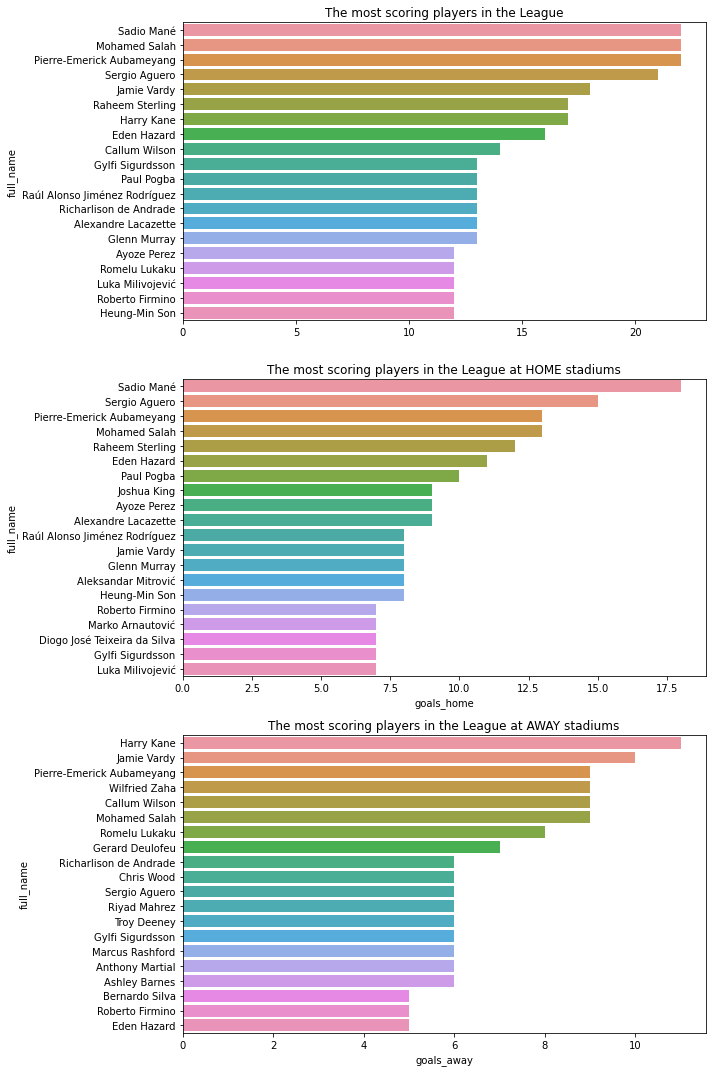

In [83]:
f, fig = plt.subplots(3, 1, figsize = (10, 15))

sns.barplot(y = players.sort_values(by = ["goals_overall"], ascending = False )["full_name"][:20], x = players["goals_home"] + players["goals_away"] , ax = fig[0]).set_title('The most scoring players in the League')

sns.barplot(y = players.sort_values(by = ["goals_home"], ascending = False )["full_name"][:20], x = players["goals_home"], ax = fig[1]).set_title('The most scoring players in the League at HOME stadiums')

sns.barplot(y = players.sort_values(by = ["goals_away"], ascending = False )["full_name"][:20], x = players["goals_away"], ax = fig[2]).set_title('The most scoring players in the League at AWAY stadiums')

f.tight_layout()

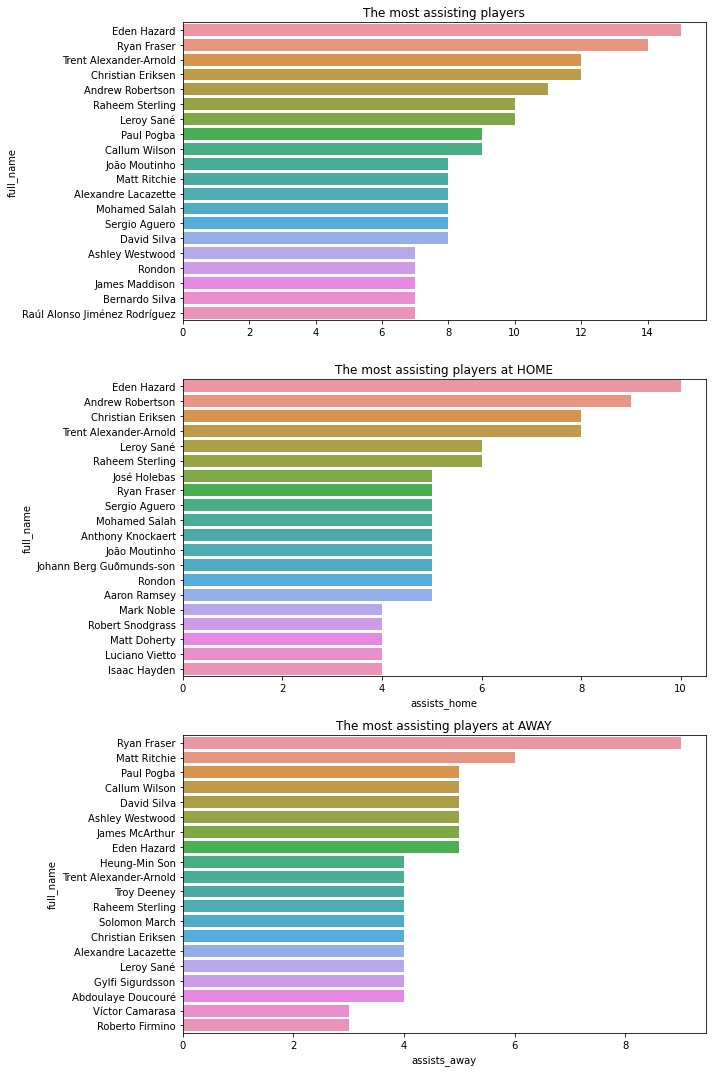

In [84]:
f, fig = plt.subplots(3, 1, figsize = (10, 15))

sns.barplot(y = players.sort_values(by = ["assists_overall"], ascending = False )["full_name"][:20], x = players["assists_home"] + players["assists_away"], ax = fig[0]).set_title('The most assisting players')

sns.barplot(y = players.sort_values(by = ["assists_home"], ascending = False )["full_name"][:20], x = players["assists_home"], ax = fig[1]).set_title('The most assisting players at HOME')

sns.barplot(y = players.sort_values(by = ["assists_away"], ascending = False )["full_name"][:20], x = players["assists_away"], ax = fig[2]).set_title('The most assisting players at AWAY')

f.tight_layout()

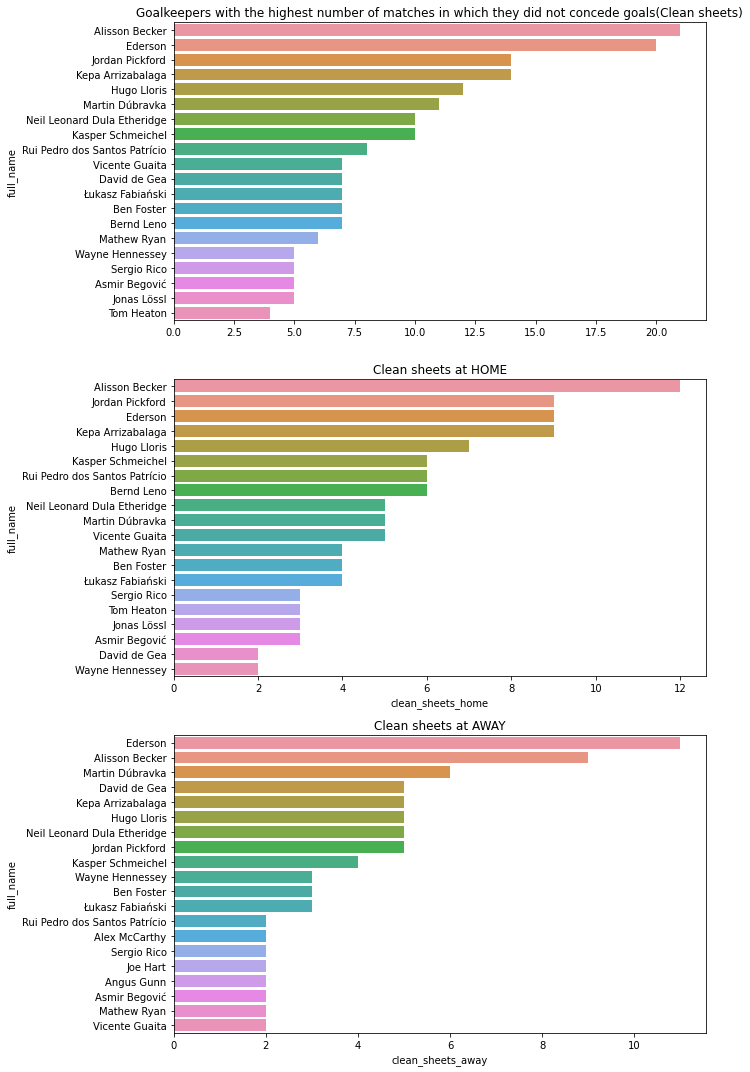

In [85]:
f, fig = plt.subplots(3, 1, figsize = (10, 15))

sns.barplot(y = players.sort_values(by = ["clean_sheets_overall"], ascending = False )["full_name"][:20], x = players["clean_sheets_home"] + players["clean_sheets_away"], ax = fig[0]).set_title('Goalkeepers with the highest number of matches in which they did not concede goals(Clean sheets)')

sns.barplot(y = players.sort_values(by = ["clean_sheets_home"], ascending = False )["full_name"][:20], x = players["clean_sheets_home"], ax = fig[1]).set_title('Clean sheets at HOME')

sns.barplot(y = players.sort_values(by = ["clean_sheets_away"], ascending = False )["full_name"][:20], x = players["clean_sheets_away"], ax = fig[2]).set_title('Clean sheets at AWAY')

f.tight_layout()

<h3>Q4.2: Players' discipline(yellow cards and red cards)</h3>

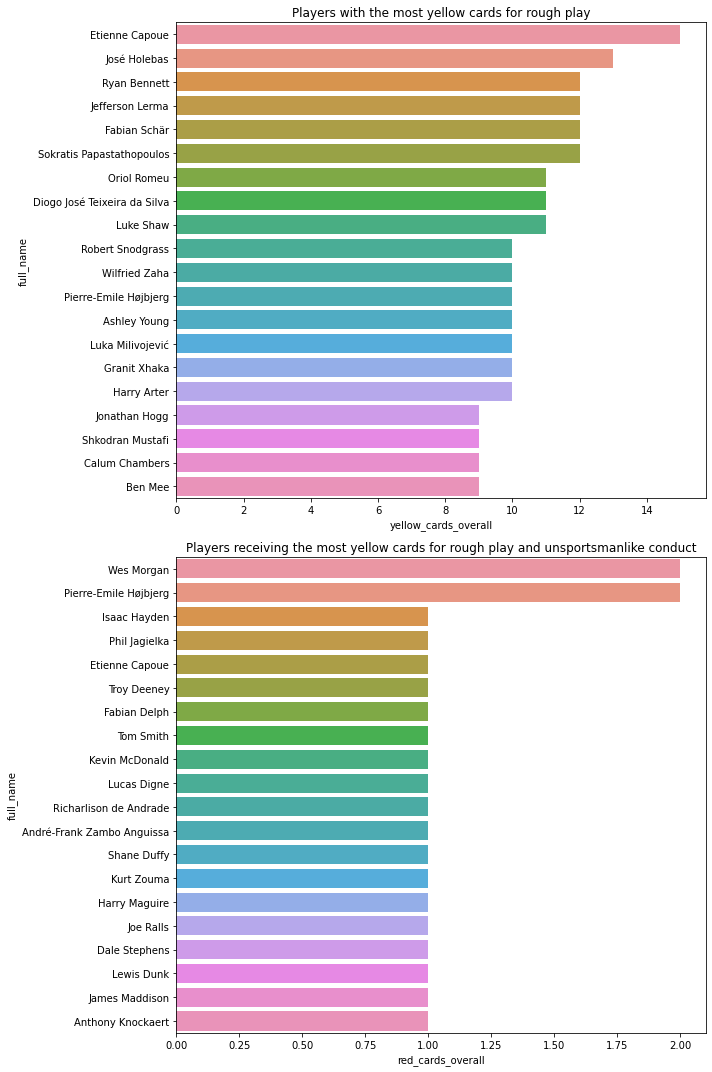

In [86]:
f, fig = plt.subplots(2, 1, figsize = (10, 15))

sns.barplot(y = players.sort_values(by = ["yellow_cards_overall"], ascending = False )["full_name"][:20], x = players["yellow_cards_overall"], ax = fig[0]).set_title("Players with the most yellow cards for rough play")

sns.barplot(y = players.sort_values(by = ["red_cards_overall"], ascending = False )["full_name"][:20], x = players["red_cards_overall"], ax = fig[1]).set_title('Players receiving the most yellow cards for rough play and unsportsmanlike conduct')

f.tight_layout()

# Findings
Here it also became known that Manchester city and Liverpool leading the League have the best scorers, passers and goalkeepers. For example, Sadio mane a Liverpool player is the top scorer despite the fact that most goals are scored at the Liverpool stadium, while his statistics are much worse on the away. It also became known that the Etienne Capoue player is the most undisciplined player, earning the most number of yellow cards. And Wes Morgan who often gets a red card for unsportsmanlike play